In [1]:
import pandas as pd
import matplotlib.pyplot as plt

MODEL_SLUG = "model"

distance = 1200

base_rider = pd.read_csv(f"./data/shortTest-{distance}-forced_action_10.csv")
# model_rider = pd.read_csv(F"./data/{MODEL_SLUG}.csv")
model_rider = pd.read_csv(f"./data/shortTest-{distance}-forced_action_10:8.csv")

base_rider_name = "100% Rider"
model_rider_name = "Model Rider"

In [2]:
print(f"{base_rider_name} time: {base_rider.shape[0]} seconds")
print(f"{model_rider_name} time: {model_rider.shape[0]} seconds")

100% Rider time: 153 seconds
Model Rider time: 149 seconds


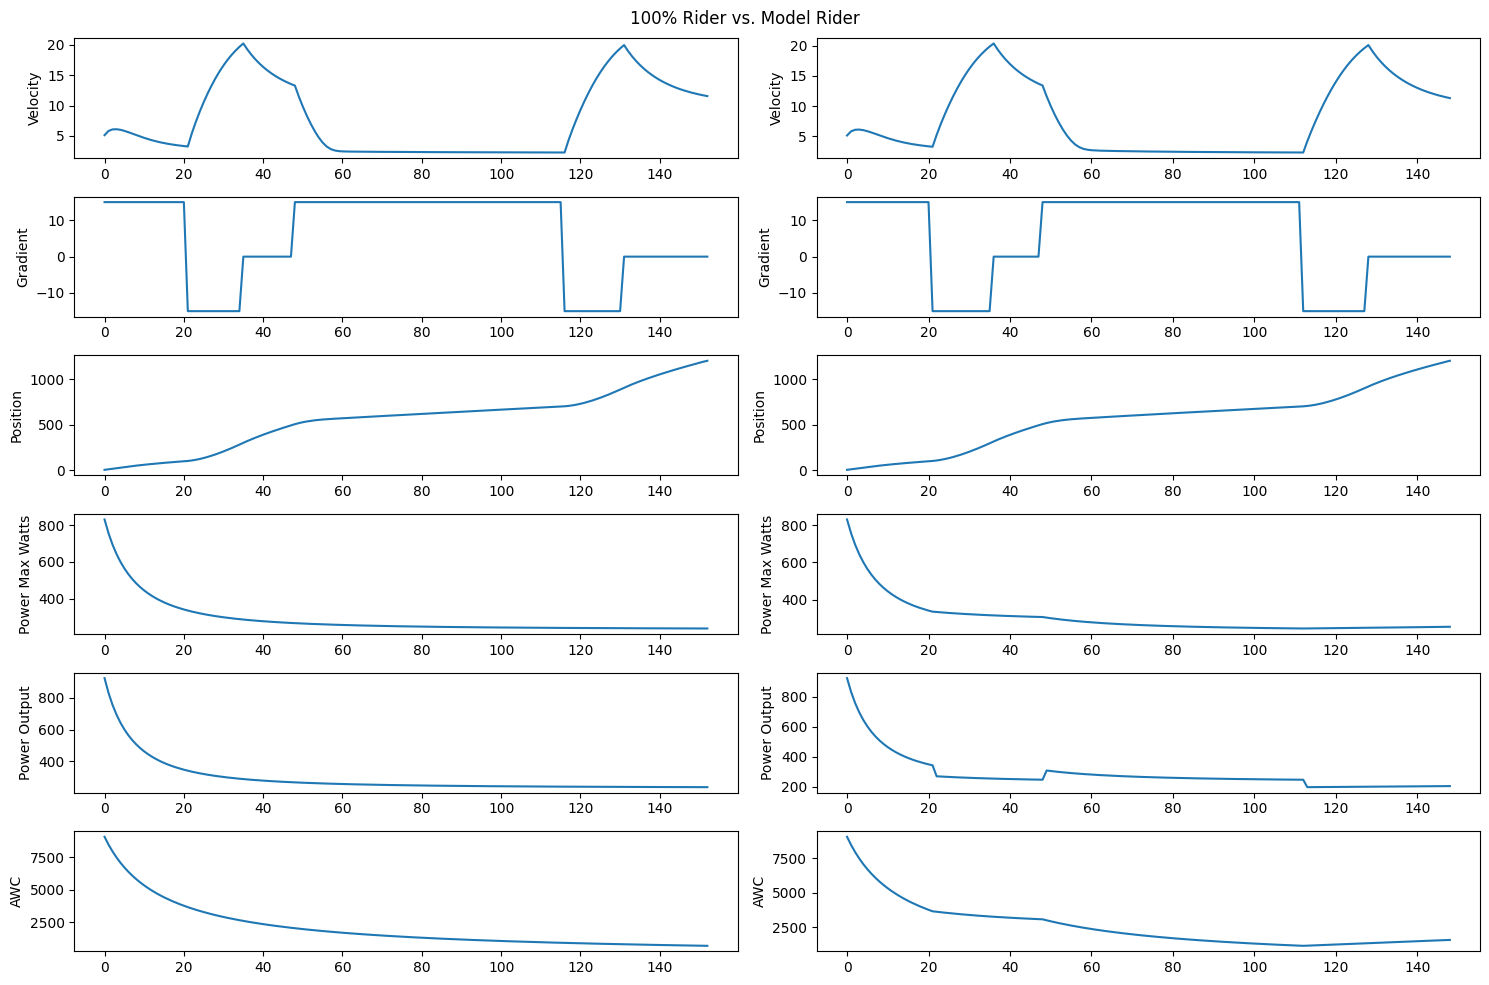

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, axs = plt.subplots(6, 2)
fig.suptitle(f"{base_rider_name} vs. {model_rider_name}")

# Plot for Rider Constant
axs[0, 0].plot(base_rider.index, base_rider['velocity'])
axs[0, 0].set_ylabel('Velocity')

axs[1, 0].plot(base_rider.index, base_rider['gradient'])
axs[1, 0].set_ylabel('Gradient')

axs[2, 0].plot(base_rider.index, base_rider['position'])
axs[2, 0].set_ylabel('Position')

axs[3, 0].plot(base_rider.index, base_rider['power_max_w'])
axs[3, 0].set_ylabel('Power Max Watts')

axs[4, 0].plot(base_rider.index, base_rider['power_agent_w'])
axs[4, 0].set_ylabel('Power Output')

axs[5, 0].plot(base_rider.index, base_rider['AWC'])
axs[5, 0].set_ylabel('AWC')

# Plot for Rider Model
axs[0, 1].plot(model_rider.index, model_rider['velocity'])
axs[0, 1].set_ylabel('Velocity')

axs[1, 1].plot(model_rider.index, model_rider['gradient'])
axs[1, 1].set_ylabel('Gradient')

axs[2, 1].plot(model_rider.index, model_rider['position'])
axs[2, 1].set_ylabel('Position')

axs[3, 1].plot(model_rider.index, model_rider['power_max_w'])
axs[3, 1].set_ylabel('Power Max Watts')

axs[4, 1].plot(model_rider.index, model_rider['power_agent_w'])
axs[4, 1].set_ylabel('Power Output')

axs[5, 1].plot(model_rider.index, model_rider['AWC'])
axs[5, 1].set_ylabel('AWC')

plt.tight_layout()
plt.show()
